# **1) Importing Libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# **2) Loading Data**

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **3) Data Exploration & Visulization**

- ##### Task 1: Survival counts

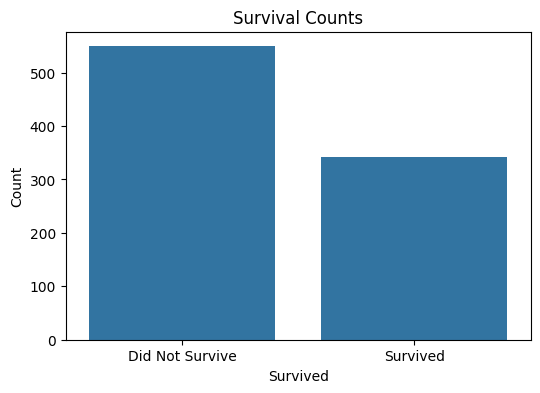

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()

- ##### Task 2: Survival by Gender

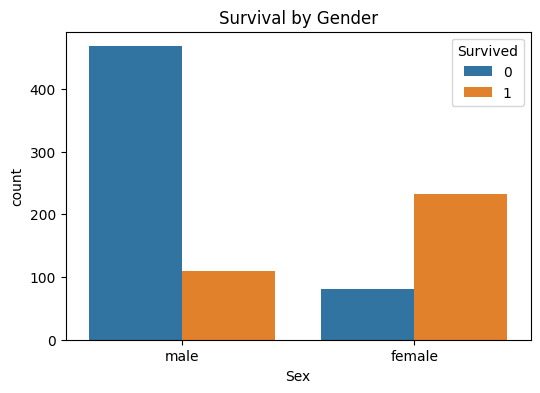

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

- ##### Task 3: Survival rate by Class

Survival Rate by Class: Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 



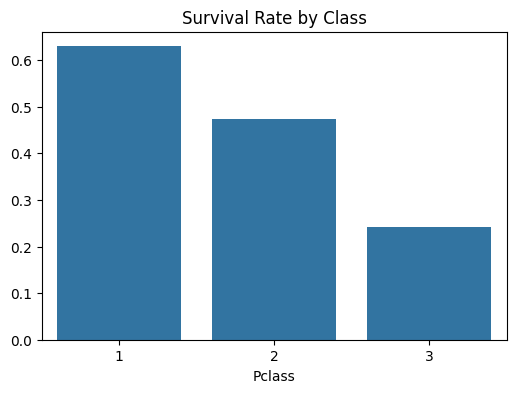

In [35]:
plt.figure(figsize=(6,4))
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:", survival_rate_by_class , "\n")


sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Class')
plt.show()

- ##### Task 4: Age distribution

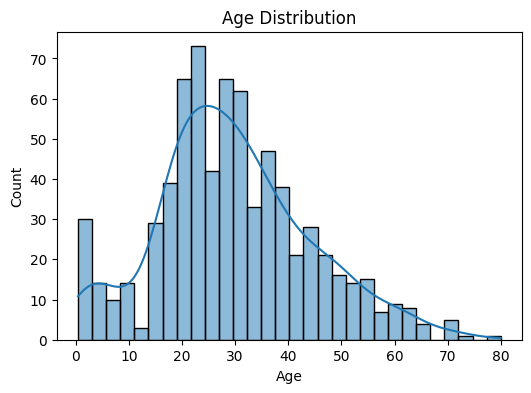


Average Age - Survivors: 28.343689655172415
Average Age - Non-survivors: 30.62617924528302


In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

avg_age_survivors = df[df['Survived']==1]['Age'].mean()
avg_age_non_survivors = df[df['Survived']==0]['Age'].mean()
print("\nAverage Age - Survivors:", avg_age_survivors)
print("Average Age - Non-survivors:", avg_age_non_survivors)

- ##### Task 5: Family survival rates

In [37]:
df['Family'] = df['SibSp'] + df['Parch']
print("Survival rate with family vs without:", df.groupby(df['Family'] > 0)['Survived'].mean())

Survival rate with family vs without: Family
False    0.303538
True     0.505650
Name: Survived, dtype: float64


- ##### Task 6: Survival rate above avg fare

In [38]:
avg_fare = df['Fare'].mean()
print("Survival rate for fare > avg:", df[df['Fare'] > avg_fare]['Survived'].mean())

Survival rate for fare > avg: 0.5971563981042654


- ##### Task 7: Age group survival

In [39]:
def age_group(age):
    if pd.isnull(age):
        return np.nan
    elif age < 16:
        return 'child'
    elif age > 60:
        return 'senior'
    else:
        return 'adult'

df['AgeGroup'] = df['Age'].apply(age_group)
print("Survival rate by Age Group:", df.groupby('AgeGroup')['Survived'].mean())

Survival rate by Age Group: AgeGroup
adult     0.366412
child     0.590361
senior    0.227273
Name: Survived, dtype: float64


- ##### Task 8: Missing values

In [10]:
print("Missing Values:", df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(["Cabin", "AgeGroup"], axis=1, inplace=True)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
AgeGroup       177
dtype: int64


/tmp/ipython-input-2316473424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2316473424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

- ##### Task 9: Correlation heatmap

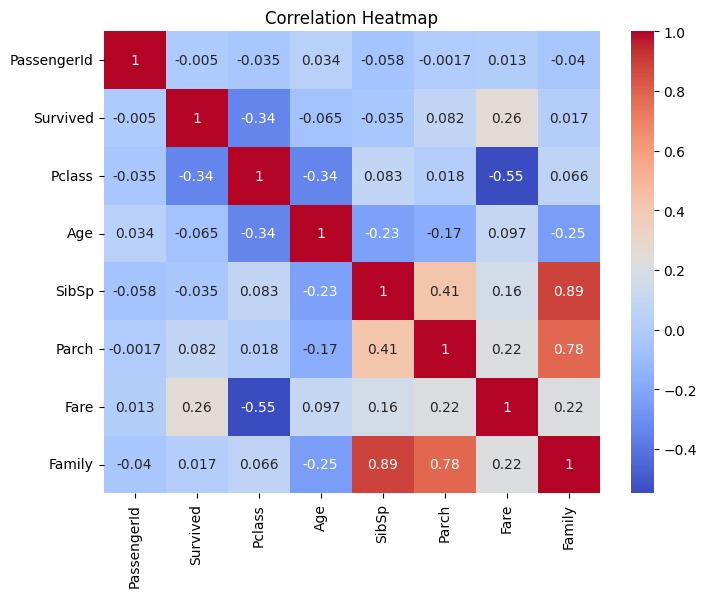

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- ##### Task 10: Survival by Embarked

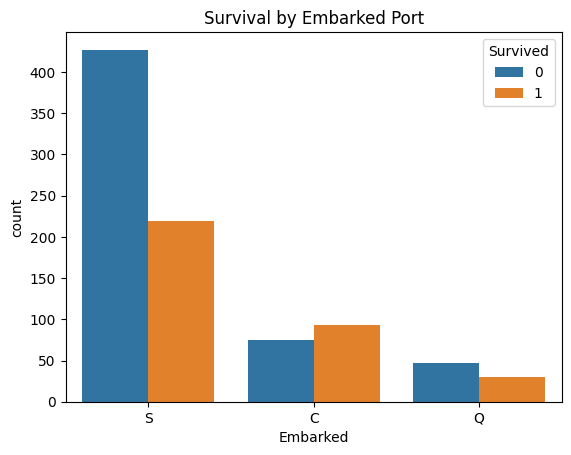

In [12]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()

# **4) Modeling with Random Forest**

- ##### Check null values

In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- ##### Drop unwanted features

In [14]:
df.drop(["PassengerId", "Name"], axis=1, inplace=True)

- ##### Encoding (Sex, Embarked, Ticket)

In [17]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])
df["Ticket"] = le.fit_transform(df["Ticket"])

- ##### Split data for features(X) and Target(y)

In [18]:
X = df.drop(["Survived"], axis=1)
y = df.Survived

- ##### Split data for training(80%) and testing(20%)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- ##### Task 11: Train Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators= 10, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [21]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8100558659217877

- ##### Task 12: Change n_estimators

In [23]:
for n in [10, 100, 500]:
    rf_n = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_n.fit(x_train, y_train)
    print(f"n_estimators={n} Accuracy:", accuracy_score(y_test, rf_n.predict(x_test)))

n_estimators=10 Accuracy: 0.8100558659217877
n_estimators=100 Accuracy: 0.8435754189944135
n_estimators=500 Accuracy: 0.8156424581005587


**`Note`** The best accuracy = 84.3% with n_estimators = 100

- ##### Task 13: Predict first 10 rows

In [25]:
print("Predictions:", rf.predict(x_test[:10]))
print("Actual:     ", y_test[:10].values)

Predictions: [0 0 0 1 0 1 1 0 1 1]
Actual:      [1 0 0 1 1 1 1 0 1 1]


- ##### Task 14: Confusion Matrix

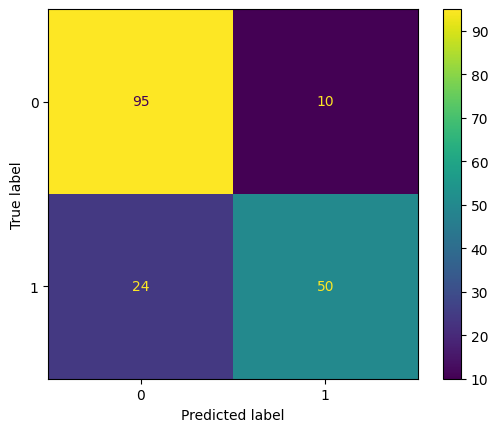

In [26]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

- Task 15: Top 3 important features

In [29]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 3 features:")
print(feature_importances.head(3))

Top 3 features:
Sex       0.336235
Ticket    0.170294
Fare      0.145499
dtype: float64


- ##### Task 16: Cross-validation

In [30]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Average CV Accuracy:", cv_scores.mean())


Average CV Accuracy: 0.8316866486723997


- ##### Task 17: Change max_depth

In [31]:
for depth in [3, 5, None]:
    rf_d = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_d.fit(x_train, y_train)
    print(f"max_depth={depth} Accuracy:", accuracy_score(y_test, rf_d.predict(x_test)))

max_depth=3 Accuracy: 0.7821229050279329
max_depth=5 Accuracy: 0.8100558659217877
max_depth=None Accuracy: 0.8435754189944135


**`Note`** With larger *max_depth*, the accuracy will increase

- ##### Task 18: Compare with Decision Tree

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(x_test)))


Decision Tree Accuracy: 0.7486033519553073


**`Note`** Random Forest is better than Decision Tree for this project
  - Random Forest Accuracy = 81%
  - Decision Tree Accuracy = 74.8%

- ##### Task 19: Top 3 survival factors

In [34]:
print("Top 3 survival factors likely:", feature_importances.head(3).index.tolist())


Top 3 survival factors likely: ['Sex', 'Ticket', 'Fare']


- ##### Task 20: Suggestions for extra features

In [44]:
print("Suggested extra features: \n  Cabin location, \n  travel companions' \n  survival, \n  ticket group size, \n  passenger nationality, \n  weather/season, \n  ship deck level.")

Suggested extra features: 
  Cabin location, 
  travel companions' 
  survival, 
  ticket group size, 
  passenger nationality, 
  weather/season, 
  ship deck level.
